<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Thay doi hinh dang x_train, y_train 
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
#Chuyen du lieu ve float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Chuan hoa du lieu ve 0 va  1 
x_train /= 255
x_test /= 255
#Bien doi vecto thanh nhi phan 
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#Xay dung model 
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
#Compile Model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Traning  Model 
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 1.0539 - accuracy: 0.6067 - val_loss: 0.6850 - val_accuracy: 0.7561
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.5892 - accuracy: 0.7831 - val_loss: 0.5872 - val_accuracy: 0.7834
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.5048 - accuracy: 0.8136 - val_loss: 0.4905 - val_accuracy: 0.8220
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4505 - accuracy: 0.8350 - val_loss: 0.4638 - val_accuracy: 0.8318
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.4168 - accuracy: 0.8463 - val_loss: 0.4276 - val_accuracy: 0.8490
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.3906 - accuracy: 0.8568 - val_loss: 0.3926 - val_accuracy: 0.8580
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3661 - accuracy: 0.8659 - val_loss: 0.4546 - val_accuracy: 0.83

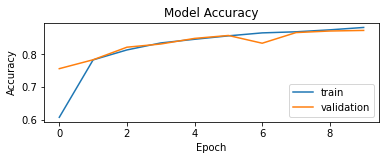

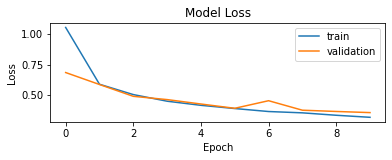

In [ ]:
#Ve do thi accuracy 
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve do thi loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.3573555648326874
Do chinh xac kiem tra 0.8734999895095825


In [ ]:
label  = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Day la so Shirt


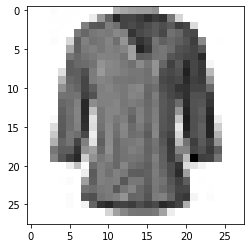

In [ ]:
#Load Anh va Du doan 
img = load_img('Untitled4.png',grayscale=False,color_mode='rgb' ,target_size=(28, 28))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = img[:,:,0]
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img/255
print('Day la  ' + label[np.argmax(model.predict(img))])


Day la Pullover


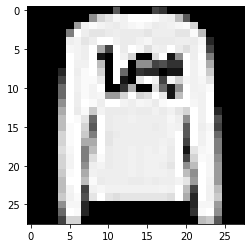

In [ ]:
img1 = load_img('sample_image.png',grayscale=False,color_mode='rgb',target_size=(28, 28))
plt.imshow(img1)
img1 = tf.keras.utils.img_to_array(img1)
img1 = img1[:,:,0]
img1 = img1.reshape(1, 28, 28, 1)
img1 = img1.astype('float32')
img1 = img1/255
print('Day la ' + label[np.argmax(model.predict(img1))])
